# CNN

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
import torchvision.transforms as transforms
from utils import run

### CIFAR10 Dataset

In [2]:
# Training batch size
batch_size = 256

# Train transformation
train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
])

# Download training data from open datasets.
training_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=train_transform,
)

# Test transformation
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
])

# Download test data from open datasets.
test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=test_transform,
)

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)


Files already downloaded and verified
Files already downloaded and verified


### Simple CNN Model

In [3]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((32, 32)),
            nn.Flatten(),
            nn.Linear(256 * 32 * 32, 10),
        )

    def forward(self, x):
        return self.net(x)

In [4]:
# Model
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))
model = CNN().to(device)
print(model)

Using cuda device
CNN(
  (net): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): AdaptiveAvgPool2d(output_size=(32, 32))
    (7): Flatten(start_dim=1, end_dim=-1)
    (8): Linear(in_features=262144, out_features=10, bias=True)
  )
)



 =============== Epoch 1 ===============
 Train accuracy: 37.8%, Avg loss: 1.708431
 Test accuracy: 52.9%, Avg loss: 1.321468

 =============== Epoch 2 ===============
 Train accuracy: 50.6%, Avg loss: 1.368371
 Test accuracy: 58.9%, Avg loss: 1.132860

 =============== Epoch 3 ===============
 Train accuracy: 58.3%, Avg loss: 1.179521
 Test accuracy: 65.2%, Avg loss: 0.990645

 =============== Epoch 4 ===============
 Train accuracy: 62.3%, Avg loss: 1.069187
 Test accuracy: 67.8%, Avg loss: 0.911867

 =============== Epoch 5 ===============
 Train accuracy: 65.1%, Avg loss: 0.995366
 Test accuracy: 69.4%, Avg loss: 0.877192

 =============== Epoch 6 ===============
 Train accuracy: 67.2%, Avg loss: 0.940531
 Test accuracy: 70.6%, Avg loss: 0.837282

 =============== Epoch 7 ===============
 Train accuracy: 69.4%, Avg loss: 0.883404
 Test accuracy: 72.7%, Avg loss: 0.801879

 =============== Epoch 8 ===============
 Train accuracy: 70.7%, Avg loss: 0.844155
 Test accuracy: 73.1%, Avg

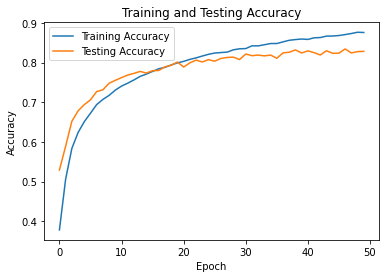

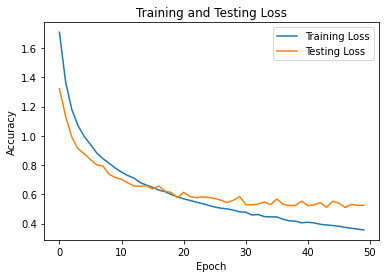

Best test accuracy: 83.42


In [5]:
# Total training epochs
epochs = 50

# Loss function
loss_fn = nn.CrossEntropyLoss()

# SGD Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.02, weight_decay=1e-4, momentum=0.9)
run(model, epochs, optimizer, loss_fn, train_dataloader=train_dataloader, test_dataloader=test_dataloader)